In [7]:
import numpy as np
import gzip
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv("covtype.data.csv")

In [29]:
colnames = ['Elevation', 'Aspect', 'Slope', 'H_Dist_Hydro', 'V_Dist_Hydro', 'H_Dist_Rd', 'Hillshade_9am', 'Hillshade_noon', 'Hillshade_3pm', 'H_Dist_Fire', 'Wilderness_area1', 'Wilderness_area2', 'Wilderness_area3', 'Wilderness_area4', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', 'Cover_type']
df = pd.read_csv("covtype.data.gz", names=colnames, compression='gzip', header=0, sep=',', quotechar='"', error_bad_lines=False)
df

,Elevation,Aspect,Slope,H_Dist_Hydro,V_Dist_Hydro,H_Dist_Rd,Hillshade_9am,Hillshade_noon,Hillshade_3pm,H_Dist_Fire,...,32,33,34,35,36,37,38,39,40,Cover_type
0,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
1,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
2,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
3,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
4,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581006,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581007,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581008,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581009,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [30]:
X = df[['Elevation', 'Aspect', 'Slope', 'H_Dist_Hydro', 'V_Dist_Hydro', 'H_Dist_Rd', 'Hillshade_9am', 'Hillshade_noon', 'Hillshade_3pm', 'H_Dist_Fire']]
y = df['Cover_type']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
rf = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1, verbose=1)

In [33]:
rf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.5min finished


RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42, verbose=1)

In [34]:
y_pred = rf.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.1s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    1.2s finished


In [35]:
r2_score(y_pred=y_pred,y_true=y_test)

0.9020968132876668

In [36]:
features = X.columns
importances = rf.feature_importances_

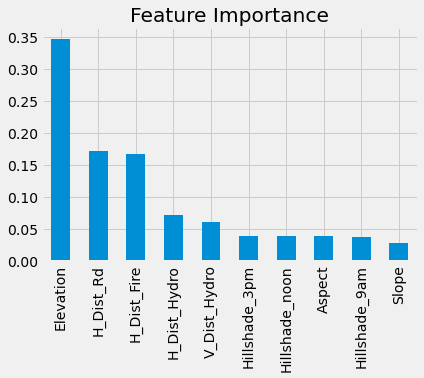

In [37]:
plt.style.use('fivethirtyeight')
feat_imp = pd.Series(importances, features).sort_values(ascending=False)
ax = feat_imp.plot(kind='bar', title='Feature Importance')